# Regression task for the data sent earlier by ql2

In [1]:
# all imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from math import sqrt
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
# Reading data
# airfare_data = pd.read_csv("airfare_lax_2019_initial.csv", delimiter=",")
airfare_data = pd.read_csv("../Data/Airfare data with day_of_week.csv", delimiter=",")
airfare_data.rename(columns = {"EXTRACT(WEEK FROM DDATE)" : "week", "DAYOFWEEK(DDATE)" : "dayofweek" ,
                              "AVG(FARE)": "average", "MIN(FARE)": "min", "MAX(FARE)": "max", 
                               "MEDIAN(FARE)" : "median", "STDDEV(FARE)" : "stddev"} , inplace = True)
airport_distance_data = pd.read_csv("../Data/distance_between_airports.csv", delimiter=",")

In [3]:
airfare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344666 entries, 0 to 344665
Data columns (total 10 columns):
TO_AIRPORT      344666 non-null object
CXR             344666 non-null object
FROM_AIRPORT    344666 non-null object
week            344666 non-null int64
dayofweek       344666 non-null int64
average         344666 non-null float64
min             344666 non-null float64
max             344666 non-null float64
median          344666 non-null float64
stddev          341659 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 26.3+ MB


In [4]:
weekdays = [1,2,3,4]
airfare_data["weekend"] = np.where(airfare_data["dayofweek"].isin(weekdays) == True, 0, 1) 

In [5]:
airfare_data.head()

,TO_AIRPORT,CXR,FROM_AIRPORT,week,dayofweek,average,min,max,median,stddev,weekend
0,ADQ,AS,ANC,1,0,213.25,109.0,362.0,191.0,101.647500,1
1,ADQ,AS,ANC,1,2,300.25,170.0,462.0,313.5,109.914946,0
2,ADQ,AS,ANC,1,3,262.00,158.0,462.0,170.0,141.506184,0
3,ADQ,AS,ANC,1,4,252.00,126.0,362.0,260.0,118.215300,0
4,ADQ,AS,ANC,1,5,294.00,126.0,462.0,362.0,136.782065,1


## Merging distance

In [6]:
airport_distance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379625 entries, 0 to 379624
Data columns (total 3 columns):
AIRPORT_FROM    379625 non-null object
AIRPORT_TO      379625 non-null object
 MILES          379625 non-null object
dtypes: object(3)
memory usage: 8.7+ MB


In [7]:
airfare_data = pd.merge(airfare_data, airport_distance_data, how = "left", left_on = ["FROM_AIRPORT", "TO_AIRPORT"]
                  , right_on = ["AIRPORT_FROM", "AIRPORT_TO"])

# Dropping unnecessary columns
airfare_data.drop(columns = ["AIRPORT_FROM", "AIRPORT_TO"], axis=1, inplace = True)

# Renaming Miles column
airfare_data.rename(columns = {" MILES " : "miles"} , inplace = True)

# Removing comma and extra space from each entry in miles
airfare_data["miles"] = airfare_data["miles"].apply(lambda x : x.replace(",", "").strip())

# Converting to numeric
airfare_data["miles"] = pd.to_numeric(airfare_data["miles"])

# Adding price/mile column
airfare_data["price_per_mile"] = airfare_data["average"] / airfare_data["miles"]

In [8]:
airfare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357808 entries, 0 to 357807
Data columns (total 13 columns):
TO_AIRPORT        357808 non-null object
CXR               357808 non-null object
FROM_AIRPORT      357808 non-null object
week              357808 non-null int64
dayofweek         357808 non-null int64
average           357808 non-null float64
min               357808 non-null float64
max               357808 non-null float64
median            357808 non-null float64
stddev            354712 non-null float64
weekend           357808 non-null int64
miles             357808 non-null int64
price_per_mile    357808 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 38.2+ MB


## Restricting to LAX

In [9]:
lax_data = airfare_data[airfare_data["TO_AIRPORT"] == "LAX"]
lax_data.head()

,TO_AIRPORT,CXR,FROM_AIRPORT,week,dayofweek,average,min,max,median,stddev,weekend,miles,price_per_mile
156132,LAX,AS,JFK,1,0,278.100000,243.0,429.0,243.0,66.108413,1,2469,0.112637
156133,LAX,AS,JFK,1,2,465.266667,392.0,697.0,472.0,72.132286,0,2469,0.188443
156134,LAX,AS,JFK,1,3,454.200000,367.0,697.0,392.0,120.372385,0,2469,0.183961
156135,LAX,AS,JFK,1,4,326.000000,209.0,429.0,319.0,73.025110,0,2469,0.132037
156136,LAX,AS,JFK,1,5,282.600000,209.0,392.0,284.0,49.279701,1,2469,0.114459


## How we interpret features?

TO_AIRPORT -> DROP

CXR -> convert to numerical (1 hot encoding for now)

FROM_AIPORT -> convert to numerical (1 hot encoding for now)

week -> convert to numerical (1 hot encoding for now)

dayofweek -> convert to numerical (1 hot encoding for now)

average -> Drop, try for regression later

min -> Drop

max -> Drop

median -> Drop

stddev -> Drop

weekend -> convert to numerical (1 hot encoding for now)

price_per_mile -> Target y variable

count    22611.000000
mean         0.403434
std          0.531082
min          0.033032
25%          0.152563
50%          0.231842
75%          0.379268
max          4.043135
Name: price_per_mile, dtype: float64

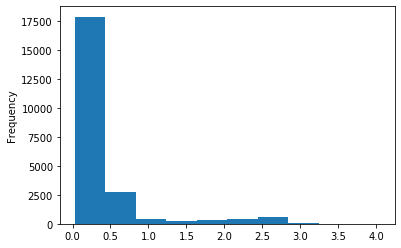

In [10]:
# lax_data.isnull().sum()
lax_data["price_per_mile"].plot(kind="hist")
lax_data["price_per_mile"].describe()

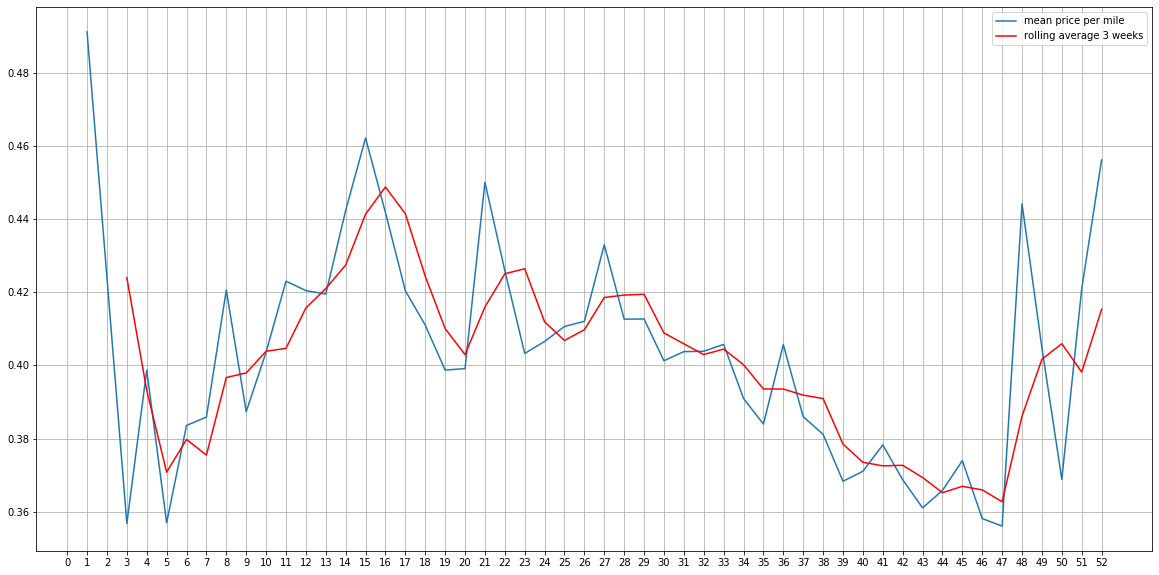

In [11]:
lax_data.head()
plt.figure(figsize=(20,10))
plt.plot(lax_data.groupby(by = ["week"])["price_per_mile"].mean())
plt.plot(lax_data.groupby(by = ["week"])["price_per_mile"].mean().rolling(window=3).mean(), 'k-', color="red")
plt.xticks(range(0,53))
plt.grid()
plt.legend(["mean price per mile", "rolling average 3 weeks"])
plt.show()

In [12]:
# Preprocessing
airfare_data_regression = lax_data.copy()
drop_columns = ["TO_AIRPORT", "average", "min", "max", "median", "stddev", "miles", "dayofweek"]
airfare_data_regression.drop(columns = drop_columns , axis=1, inplace = True)
one_hot_encoding_columns = ["CXR", "FROM_AIRPORT", "week", "weekend"]
airfare_data_regression = pd.get_dummies(airfare_data_regression,columns=one_hot_encoding_columns, 
                                         prefix = one_hot_encoding_columns, drop_first=True)
airfare_data_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22611 entries, 156132 to 178742
Data columns (total 91 columns):
price_per_mile      22611 non-null float64
CXR_B6              22611 non-null uint8
CXR_DL              22611 non-null uint8
CXR_HA              22611 non-null uint8
CXR_NK              22611 non-null uint8
CXR_UA              22611 non-null uint8
FROM_AIRPORT_BOS    22611 non-null uint8
FROM_AIRPORT_CUN    22611 non-null uint8
FROM_AIRPORT_DCA    22611 non-null uint8
FROM_AIRPORT_DEN    22611 non-null uint8
FROM_AIRPORT_DFW    22611 non-null uint8
FROM_AIRPORT_DTW    22611 non-null uint8
FROM_AIRPORT_EUG    22611 non-null uint8
FROM_AIRPORT_EWR    22611 non-null uint8
FROM_AIRPORT_FAT    22611 non-null uint8
FROM_AIRPORT_FLL    22611 non-null uint8
FROM_AIRPORT_HNL    22611 non-null uint8
FROM_AIRPORT_IAD    22611 non-null uint8
FROM_AIRPORT_IAH    22611 non-null uint8
FROM_AIRPORT_JFK    22611 non-null uint8
FROM_AIRPORT_KOA    22611 non-null uint8
FROM_AIRPORT_LAS    22

In [13]:
# Data view
airfare_data_regression.head()

,price_per_mile,CXR_B6,CXR_DL,CXR_HA,CXR_NK,CXR_UA,FROM_AIRPORT_BOS,FROM_AIRPORT_CUN,FROM_AIRPORT_DCA,FROM_AIRPORT_DEN,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,weekend_1
156132,0.112637,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156133,0.188443,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156134,0.183961,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156135,0.132037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156136,0.114459,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
regression_columns = [column for column in airfare_data_regression.columns.tolist() if column!="price_per_mile"]
X = airfare_data_regression[regression_columns]
y = airfare_data_regression["price_per_mile"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), reg.coef_):
    print(x,round(y,2))

Train RMSE error 0.15054358851763047
Test RMSE error 0.15062087540412233
Coefficients
CXR_B6 0.04
CXR_DL 0.12
CXR_HA 0.17
CXR_NK -0.1
CXR_UA 0.23
FROM_AIRPORT_BOS 0.05
FROM_AIRPORT_CUN 0.07
FROM_AIRPORT_DCA 0.17
FROM_AIRPORT_DEN 0.15
FROM_AIRPORT_DFW 0.1
FROM_AIRPORT_DTW 0.2
FROM_AIRPORT_EUG 0.22
FROM_AIRPORT_EWR 0.07
FROM_AIRPORT_FAT 1.77
FROM_AIRPORT_FLL 0.16
FROM_AIRPORT_HNL 0.04
FROM_AIRPORT_IAD 0.05
FROM_AIRPORT_IAH 0.22
FROM_AIRPORT_JFK 0.16
FROM_AIRPORT_KOA 0.04
FROM_AIRPORT_LAS 0.52
FROM_AIRPORT_LHR 0.79
FROM_AIRPORT_LIH 0.02
FROM_AIRPORT_MCI 0.2
FROM_AIRPORT_MCO 0.0
FROM_AIRPORT_MEX 0.29
FROM_AIRPORT_MSP 0.19
FROM_AIRPORT_MSY 0.21
FROM_AIRPORT_OAK 0.35
FROM_AIRPORT_OGG 0.08
FROM_AIRPORT_ORD 0.1
FROM_AIRPORT_PDX 0.09
FROM_AIRPORT_PHL 0.18
FROM_AIRPORT_RNO 0.31
FROM_AIRPORT_SAN 2.06
FROM_AIRPORT_SEA 0.1
FROM_AIRPORT_SFO 0.36
FROM_AIRPORT_SLC 0.24
week_2 -0.06
week_3 -0.14
week_4 -0.1
week_5 -0.13
week_6 -0.11
week_7 -0.12
week_8 -0.09
week_9 -0.12
week_10 -0.1
week_11 -0.08
week

In [16]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, clf.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), clf.coef_):
    print(x,round(y,2))

Train RMSE error 0.5324336744754259
Test RMSE error 0.528291349788383
Coefficients
CXR_B6 -0.0
CXR_DL 0.0
CXR_HA -0.0
CXR_NK -0.0
CXR_UA 0.0
FROM_AIRPORT_BOS -0.0
FROM_AIRPORT_CUN -0.0
FROM_AIRPORT_DCA -0.0
FROM_AIRPORT_DEN -0.0
FROM_AIRPORT_DFW -0.0
FROM_AIRPORT_DTW -0.0
FROM_AIRPORT_EUG 0.0
FROM_AIRPORT_EWR -0.0
FROM_AIRPORT_FAT 0.0
FROM_AIRPORT_FLL -0.0
FROM_AIRPORT_HNL -0.0
FROM_AIRPORT_IAD -0.0
FROM_AIRPORT_IAH -0.0
FROM_AIRPORT_JFK -0.0
FROM_AIRPORT_KOA -0.0
FROM_AIRPORT_LAS 0.0
FROM_AIRPORT_LHR 0.0
FROM_AIRPORT_LIH -0.0
FROM_AIRPORT_MCI -0.0
FROM_AIRPORT_MCO -0.0
FROM_AIRPORT_MEX 0.0
FROM_AIRPORT_MSP -0.0
FROM_AIRPORT_MSY -0.0
FROM_AIRPORT_OAK -0.0
FROM_AIRPORT_OGG -0.0
FROM_AIRPORT_ORD -0.0
FROM_AIRPORT_PDX -0.0
FROM_AIRPORT_PHL -0.0
FROM_AIRPORT_RNO 0.0
FROM_AIRPORT_SAN 0.0
FROM_AIRPORT_SEA -0.0
FROM_AIRPORT_SFO 0.0
FROM_AIRPORT_SLC 0.0
week_2 0.0
week_3 -0.0
week_4 0.0
week_5 -0.0
week_6 -0.0
week_7 -0.0
week_8 0.0
week_9 -0.0
week_10 0.0
week_11 0.0
week_12 -0.0
week_13 -0.0